1、使用逻辑回归构造客户流失概率预测模型，并提供测试数的模型检验结果，注意共线性问题；

在分析中，注意区分训练集和验证集。




In [2]:
#在"teleco.csv"中保存有客户流失的数据，其中每个变量的含义如下：
#region  所在区域
#tenure  电信客户年限
#age	年龄
#marital	是否已婚
#address	在当前地址待的年数
#income	家庭收入（单位：千）
#ed	教育水平
#employ	在目前公司的雇佣年限
#retire	是否退休
#gender	性别
#reside	家庭成员数
#tollfree	是否免电话费
#equip	是否租借设备
#callcard	是否使用电话卡服务
#wireless	是否使用无线接入服务
#longmon	上月长途费用
#tollmon	上月免电话费用
#equipmon	上月租借设备费用
#cardmon	上月使用电话卡服务费用
#wiremon	上月使用无线接入服务费用
#longten	长途保有期
#tollten	免电话费保有期
#equipten	租借设备保有期
#cardten	电话卡服务保有期
#wireten	无线服务保有期
#multline	是否多行
#voice	是否使用语音
#pager	是否开通传呼功能
#internet	是否使用网络
#callwait	是否支持呼叫等待
#forward	是否支持转接
#confer	是否开通电话会议
#ebill	是否支持电子凭证
#lninc	电信消费
#custcat	客户类型（客户接受的服务类型）
#churn	是否流失

teleco <- read.csv("data/teleco.csv",fileEncoding="GBK")

head(teleco)

region,tenure,age,marital,address,income,ed,employ,retire,gender,⋯,voice,pager,internet,callwait,forward,confer,ebill,lninc,custcat,churn
Zone 2,13,44,Married,9,64.00,College degree,5,No,Male,⋯,No,No,No,No,Yes,No,No,4.16,Basic service,Yes
Zone 3,11,33,Married,7,136.00,Post-undergraduate degree,5,No,Male,⋯,Yes,Yes,No,Yes,Yes,Yes,No,4.91,Total service,Yes
Zone 3,68,52,Married,24,116.00,Did not complete high school,29,No,Female,⋯,No,No,No,Yes,No,Yes,No,4.75,Plus service,No
Zone 2,33,33,Unmarried,12,33.00,High school degree,0,No,Female,⋯,No,No,No,No,No,No,No,3.50,Basic service,Yes
Zone 2,23,30,Married,9,30.00,Did not complete high school,2,No,Male,⋯,No,No,No,No,Yes,Yes,No,3.40,Plus service,No
Zone 2,41,39,Unmarried,17,78.00,High school degree,16,No,Female,⋯,No,No,No,Yes,No,No,No,4.36,Plus service,No


In [12]:

ind_cols<-c("churn","marital","retire","tollfree","equip","callcard","wireless","multline","voice","pager","internet","callwait","forward","confer","ebill")

In [17]:
teleco0<-teleco

for (ind_col in ind_cols){
    
    ind_col_n<-paste0(ind_col,"_ind")
 
    teleco0[,ind_col_n]<-unclass(as.factor(teleco0[,ind_col]))-1
}

head(teleco0)

region,tenure,age,marital,address,income,ed,employ,retire,gender,⋯,callcard_ind,wireless_ind,multline_ind,voice_ind,pager_ind,internet_ind,callwait_ind,forward_ind,confer_ind,ebill_ind
Zone 2,13,44,Married,9,64.00,College degree,5,No,Male,⋯,1,0,0,0,0,0,0,1,0,0
Zone 3,11,33,Married,7,136.00,Post-undergraduate degree,5,No,Male,⋯,1,1,0,1,1,0,1,1,1,0
Zone 3,68,52,Married,24,116.00,Did not complete high school,29,No,Female,⋯,1,0,0,0,0,0,1,0,1,0
Zone 2,33,33,Unmarried,12,33.00,High school degree,0,No,Female,⋯,0,0,0,0,0,0,0,0,0,0
Zone 2,23,30,Married,9,30.00,Did not complete high school,2,No,Male,⋯,0,0,0,0,0,0,0,1,1,0
Zone 2,41,39,Unmarried,17,78.00,High school degree,16,No,Female,⋯,1,0,0,0,0,0,1,0,0,0


In [27]:
set.seed(100)
select<-sample(1:nrow(teleco0),length(teleco0$region)*0.7)
train<-teleco0[select,]
test<-teleco0[-select,]


In [19]:
ind_cols0<-paste0(ind_cols,"_ind")
explained_col<-ind_cols0[1]
explain_cols<-ind_cols0[-1]

explain_cols

[1] "marital_ind"  "retire_ind"   "tollfree_ind" "equip_ind"    "callcard_ind"
 [6] "wireless_ind" "multline_ind" "voice_ind"    "pager_ind"    "internet_ind"
[11] "callwait_ind" "forward_ind"  "confer_ind"   "ebill_ind"

In [20]:
table(teleco0[,explained_col])


  0   1 
726 274 

In [22]:
lgm0<- glm(churn~marital_ind+retire_ind+tollfree_ind+equip_ind+callcard_ind+wireless_ind+multline_ind+voice_ind+pager_ind+internet_ind+callwait_ind+forward_ind+confer_ind+ebill_ind,
          ,data=teleco0,family=binomial(link = "logit"))

summary(lgm0)


Call:
glm(formula = churn ~ marital_ind + retire_ind + tollfree_ind + 
    equip_ind + callcard_ind + wireless_ind + multline_ind + 
    voice_ind + pager_ind + internet_ind + callwait_ind + forward_ind + 
    confer_ind + ebill_ind, family = binomial(link = "logit"), 
    data = teleco0)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.0238  -0.8010  -0.4692   0.8456   2.4629  

Coefficients:
              Estimate Std. Error z value Pr(>|z|)    
(Intercept)  -0.972349   0.190285  -5.110 3.22e-07 ***
marital_ind   0.119343   0.159863   0.747 0.455346    
retire_ind   -1.050722   0.621431  -1.691 0.090873 .  
tollfree_ind  0.308646   0.233497   1.322 0.186221    
equip_ind     0.796772   0.211175   3.773 0.000161 ***
callcard_ind -1.298153   0.193487  -6.709 1.96e-11 ***
wireless_ind  0.199230   0.269094   0.740 0.459073    
multline_ind -0.568403   0.178011  -3.193 0.001408 ** 
voice_ind     0.579183   0.226153   2.561 0.010436 *  
pager_ind     0.007179   0.247

In [24]:
lgm0_ms<-step(lgm0,direction = "both")

summary(lgm0_ms)

Start:  AIC=1010.81
churn ~ marital_ind + retire_ind + tollfree_ind + equip_ind + 
    callcard_ind + wireless_ind + multline_ind + voice_ind + 
    pager_ind + internet_ind + callwait_ind + forward_ind + confer_ind + 
    ebill_ind

               Df Deviance    AIC
- pager_ind     1   980.81 1008.8
- wireless_ind  1   981.36 1009.4
- marital_ind   1   981.37 1009.4
- callwait_ind  1   982.12 1010.1
- forward_ind   1   982.20 1010.2
- confer_ind    1   982.32 1010.3
- tollfree_ind  1   982.57 1010.6
<none>              980.81 1010.8
- ebill_ind     1   983.02 1011.0
- retire_ind    1   984.50 1012.5
- voice_ind     1   987.39 1015.4
- internet_ind  1   989.42 1017.4
- multline_ind  1   991.29 1019.3
- equip_ind     1   995.13 1023.1
- callcard_ind  1  1028.56 1056.6

Step:  AIC=1008.81
churn ~ marital_ind + retire_ind + tollfree_ind + equip_ind + 
    callcard_ind + wireless_ind + multline_ind + voice_ind + 
    internet_ind + callwait_ind + forward_ind + confer_ind + 
    ebill_ind




Call:
glm(formula = churn ~ retire_ind + equip_ind + callcard_ind + 
    multline_ind + voice_ind + internet_ind + ebill_ind, family = binomial(link = "logit"), 
    data = teleco0)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.8520  -0.8197  -0.4701   0.8211   2.3676  

Coefficients:
             Estimate Std. Error z value Pr(>|z|)    
(Intercept)   -0.9181     0.1510  -6.081 1.20e-09 ***
retire_ind    -1.0483     0.6188  -1.694 0.090262 .  
equip_ind      0.8437     0.2070   4.075 4.60e-05 ***
callcard_ind  -1.2288     0.1738  -7.068 1.57e-12 ***
multline_ind  -0.5933     0.1763  -3.366 0.000762 ***
voice_ind      0.6626     0.1893   3.499 0.000467 ***
internet_ind   0.6025     0.2023   2.979 0.002894 ** 
ebill_ind      0.3260     0.1961   1.662 0.096434 .  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 1174.39  on 999  degrees of freedom
Residual deviance:  9

In [29]:
train$lg_p<- predict(lgm0_ms,train)

summary(train$lg_p)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
-3.7880 -2.1470 -1.1670 -1.2000 -0.3055  1.5170 

In [35]:
cal_p <-function (lg_p){
    return -1/(1+exp(-1*lg_p))
}

In [40]:
train$p<- tapply(train$lg_p,cal_p)
summary(train$p)

ERROR: Error in unique.default(x, nmax = nmax): unique() applies only to vectors


In [30]:
train$p<-1/(1+exp(-1*train$lg_p))
summary(train$p)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
0.02213 0.10460 0.23740 0.27640 0.42420 0.82000 

In [33]:
library(car)
vif(lgm0)

marital_ind   retire_ind tollfree_ind    equip_ind callcard_ind wireless_ind 
    1.029082     1.015127     2.186966     1.794958     1.472875     2.682526 
multline_ind    voice_ind    pager_ind internet_ind callwait_ind  forward_ind 
    1.271636     1.923917     2.129902     1.690767     2.208860     2.109605 
  confer_ind    ebill_ind 
    1.994632     1.622850

In [34]:
test$lg_p<-predict(lgm0_ms, test) 
test$p<-(1/(1+exp(-1*test$lg_p)))
summary(test$p)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
0.02213 0.10460 0.27530 0.26840 0.42170 0.82000 

In [42]:
test$out<-1
test[test$p<0.2,]$out<-0
table(test[,explained_col],test$out)

   
      0   1
  0 125  99
  1  12  64

Type 'citation("pROC")' for a citation.

Attaching package: ‘pROC’

The following objects are masked from ‘package:stats’:

    cov, smooth, var



Area under the curve: 0.7687

Area under the curve: 0.7732


	DeLong's test for two ROC curves

data:  r1 and r2
D = -0.12519, df = 547.62, p-value = 0.9004
alternative hypothesis: true difference in AUC is not equal to 0
sample estimates:
AUC of roc1 AUC of roc2 
  0.7686879   0.7732025 


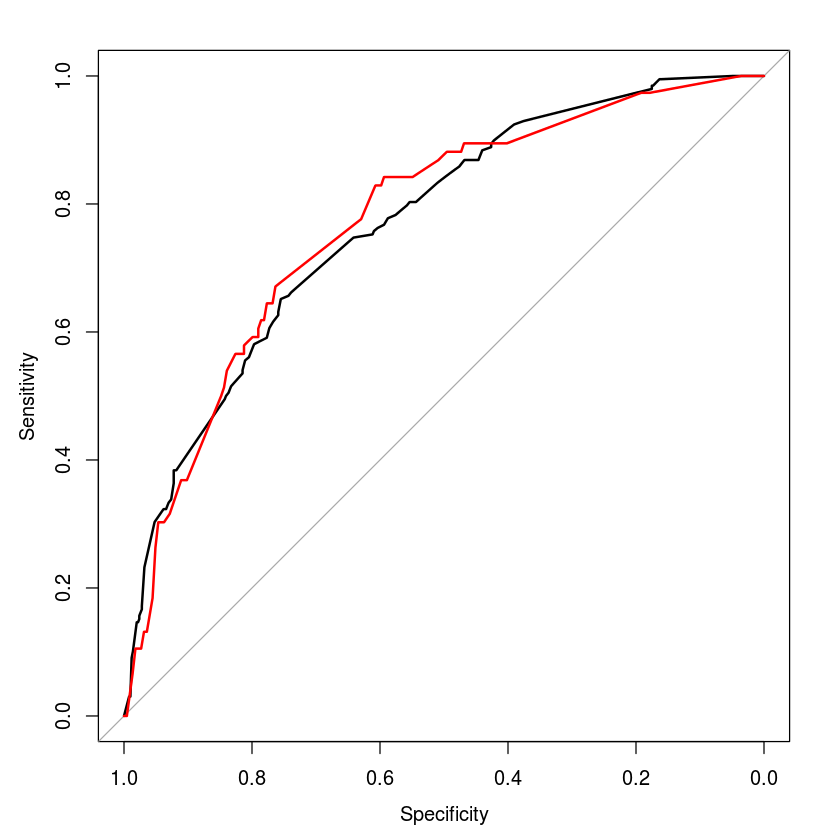

In [43]:
library(pROC)
plot.roc(train[,explained_col]~p,train,col="1")->r1
rocobjtr<- roc(train[,explained_col], train$p)
auc(rocobjtr)
lines.roc(test[,explained_col]~p,test,col='2')->r2
rocobjte <- roc(test[,explained_col], test$p)
auc(rocobjte)
roc.test(r1,r2)

Loading required package: gplots

Attaching package: ‘gplots’

The following object is masked from ‘package:stats’:

    lowess



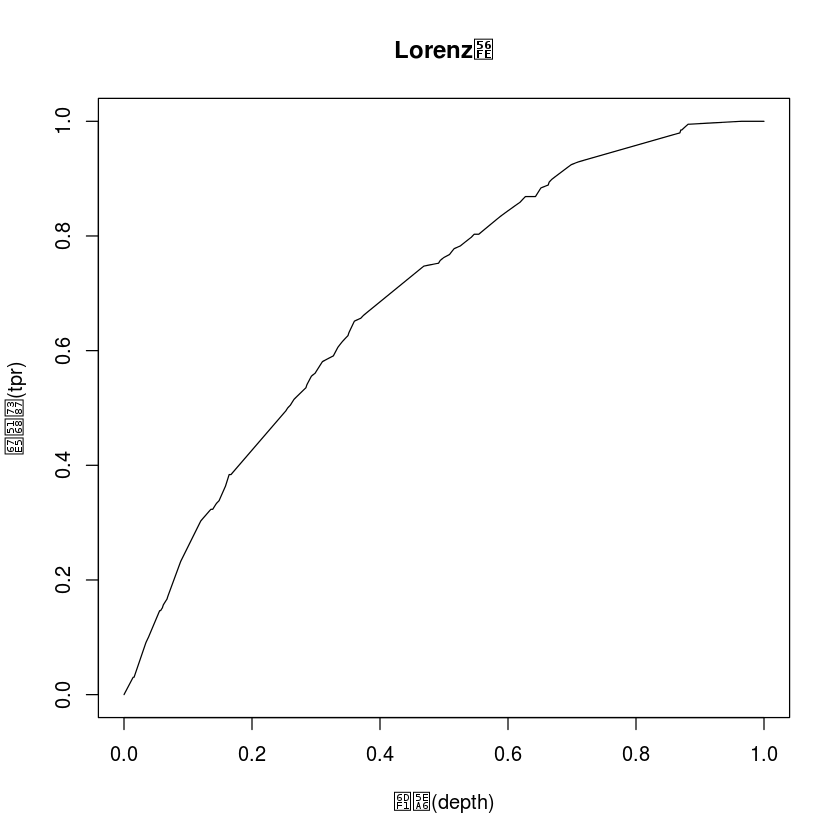

In [45]:
library(ROCR)
pred_Tr <- prediction(train$p, train[,explained_col])
tpr <- performance(pred_Tr,measure='tpr')@y.values[[1]]
depth <- performance(pred_Tr,measure='rpp')@y.values[[1]]
plot(depth,tpr,type='l',main='Lorenz图',ylab='查全率(tpr)',xlab='深度(depth)')

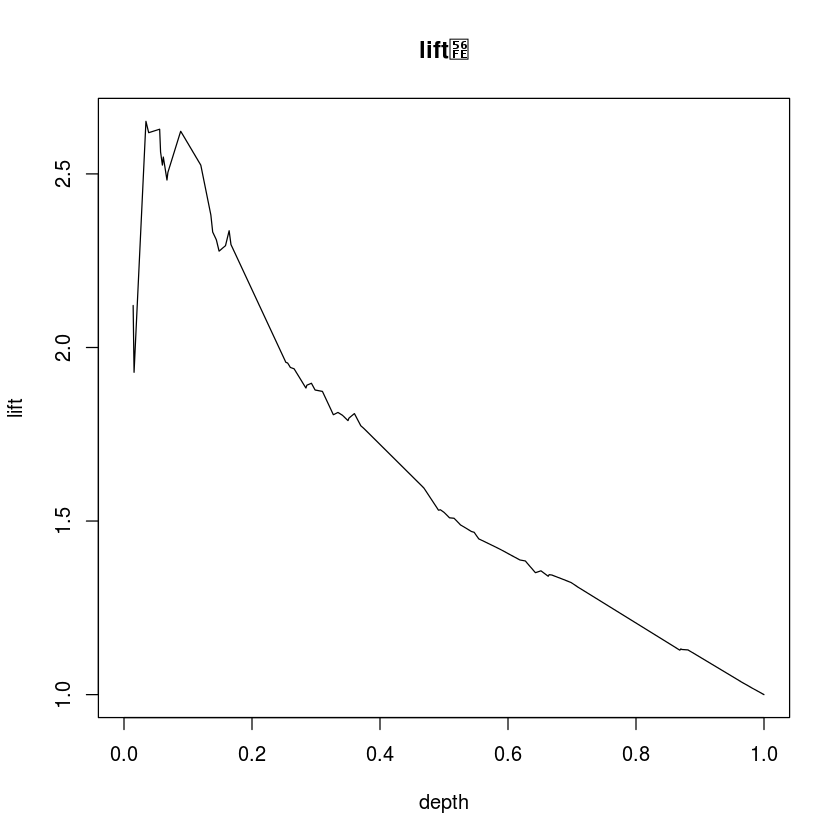

In [46]:
pred_Tr <- prediction(train$p, train[,explained_col])
lift <- performance(pred_Tr,measure='lift')@y.values[[1]]
depth <- performance(pred_Tr,measure='rpp')@y.values[[1]]
plot(depth,lift,type='l',main='lift图',ylab='lift',xlab='depth')

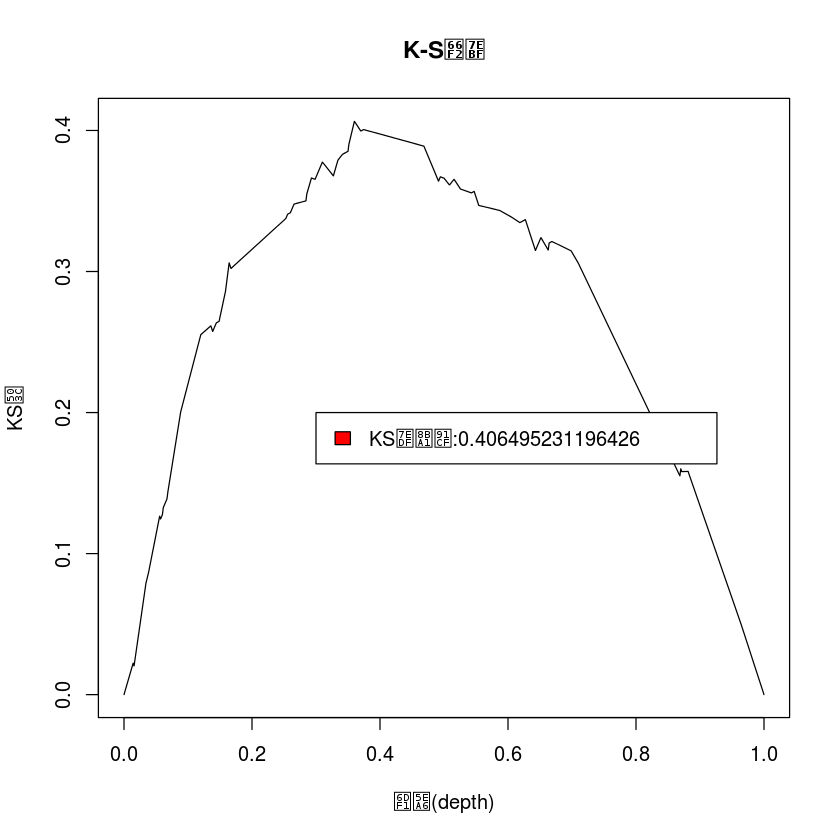

In [47]:
pred_Tr <- prediction(train$p, train[,explained_col])
tpr <- performance(pred_Tr,measure='tpr')@y.values[[1]]
fpr <- performance(pred_Tr,measure='fpr')@y.values[[1]]
ks<-(tpr-fpr)
depth <- performance(pred_Tr,measure='rpp')@y.values[[1]]
plot(depth,ks,type='l',main='K-S曲线',ylab='KS值',xlab='深度(depth)')
kslable<-paste("KS统计量:",max(ks),sep="")
legend(0.3,0.2,c(kslable),2:8)